<img src="./pic/sharif-main-logo.png" alt="SUT logo" width=345 height=345 align=left class="saturate">


<br>
<font>
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Fall 2024<br>
<font color=3C99D size=5>
    Practical Assignment 2 - Unsupervised Learning<br>
<font color=696880 size=4>
    Assignment Supervisor: Niki Sepasian <br>
<font color=696880 size=5>
    Sarina Heshmati


In [1]:
student_number = 401106617
full_name = 'Alireza Mirrokni'
assert student_number and full_name is not None, 'please input your information'

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Configure visualizations
sns.set(style="whitegrid")

## Overview

In this assignment, you will explore a dataset containing information about employees and use that data to train models capable of predicting whether those employees have left the company (attrited) or not. You will start by exploring the dataset, analyzing its features, and performing necessary preprocessing steps (such as label encoding and scaling). Then, you will build and evaluate implementations of K-Nearest Neighbors (KNN) as well as Random Forest, Bagging, and AdaBoost classifiers. After training and tuning each model, you’ll compare their performance using metrics like accuracy and feature importance to identify the best approach for accurate attrition prediction.

# Load and Explore Dataset (10 points)

In [48]:
import pandas as pd

# Load the dataset
# "Attrition" is our target columm

df = pd.read_csv('dataset.csv')
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,29,No,Travel_Rarely,592,Research & Development,7,3,Life Sciences,1,1883,...,2,80,0,11,2,3,3,2,1,2
1,34,No,Travel_Rarely,1326,Sales,3,3,Other,1,1478,...,4,80,0,15,2,3,13,9,3,12
2,27,No,Travel_Rarely,954,Sales,9,3,Marketing,1,1965,...,1,80,0,7,5,3,7,7,0,7
3,32,No,Travel_Rarely,929,Sales,10,3,Marketing,1,722,...,4,80,0,10,2,2,10,7,0,8
4,50,No,Travel_Frequently,1234,Research & Development,20,5,Medical,1,1606,...,3,80,1,32,3,3,30,8,12,13


Explore the dataset and get familiar with its features and statistics. (don't worry about the 'masked values' in our target column. They are simply used to automatically test your model later on.)

In [49]:
# TODO: Check the basic structure of the dataset using .info() and .describe()
# Use: df.info() to check data types and missing values
# Use: df.describe() to get summary statistics of numeric features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 902 entries, 0 to 901
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       902 non-null    int64 
 1   Attrition                 902 non-null    object
 2   BusinessTravel            902 non-null    object
 3   DailyRate                 902 non-null    int64 
 4   Department                902 non-null    object
 5   DistanceFromHome          902 non-null    int64 
 6   Education                 902 non-null    int64 
 7   EducationField            902 non-null    object
 8   EmployeeCount             902 non-null    int64 
 9   EmployeeNumber            902 non-null    int64 
 10  EnvironmentSatisfaction   902 non-null    int64 
 11  Gender                    902 non-null    object
 12  HourlyRate                902 non-null    int64 
 13  JobInvolvement            902 non-null    int64 
 14  JobLevel                  

In [50]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,902.000000,902.000000,902.000000,902.000000,902.0,902.000000,902.000000,902.000000,902.000000,902.000000,...,902.000000,902.0,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000
mean,36.832594,797.782705,9.433481,2.952328,1.0,1014.508869,2.688470,67.124169,2.721729,2.021064,...,2.694013,80.0,0.804878,11.043237,2.815965,2.743902,6.794900,4.144124,2.144124,3.936807
std,9.306933,405.292650,8.248331,1.041295,0.0,608.153731,1.103652,20.558087,0.710750,1.093112,...,1.083397,0.0,0.862113,7.810982,1.309680,0.708159,6.089151,3.647824,3.108697,3.480307
min,18.000000,103.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,459.750000,2.000000,2.000000,1.0,477.250000,2.000000,49.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,35.000000,801.500000,7.000000,3.000000,1.0,1001.500000,3.000000,67.500000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1156.250000,15.000000,4.000000,1.0,1553.750000,4.000000,85.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,2.000000,7.000000
max,60.000000,1496.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [51]:
 # TODO: Check for any missing values in the dataset
# Use: df.isnull().sum() to find if any column has missing values
missing_values = df.isnull().sum()
print("Columns with Missing Values:", list(missing_values[missing_values > 0]))
missing_values

Columns with Missing Values: []


Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Attrition
No     713
Yes    189
Name: count, dtype: int64


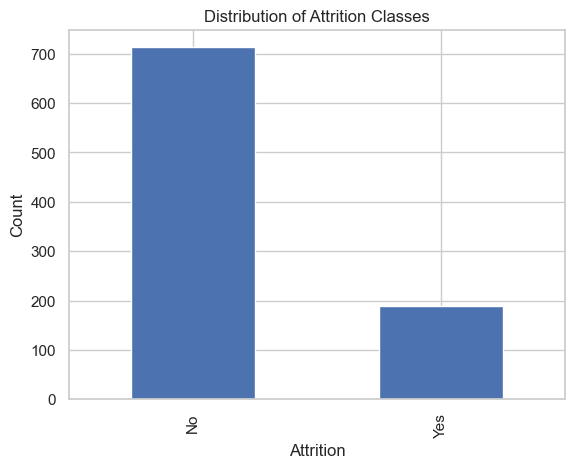

In [52]:
# TODO: Explore the target variable (binary classification)
# Use value_counts() to see the distribution of our target (Attrition) column and then visualize it (bar plot).
print(df['Attrition'].value_counts())

df['Attrition'].value_counts().plot(kind='bar')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.title('Distribution of Attrition Classes')
plt.show()

It is generally better to remove columns with only one unique value from a DataFrame when preparing data for a decision tree. <br>
Such columns do not provide any useful information for splitting the data and can lead to unnecessary complexity in the model. Remove the said columns from the DataFrame.

In [53]:
# TODO Measure and print the number of unique values for each column. 
# Check if there are any columns with less than 2 unique values. If so, remove them. 

unique_values = {col: df[col].nunique() for col in df.columns}

unique_values_df = pd.DataFrame(list(unique_values.items()), columns=['Column', 'Unique Values'])

unique_values_df

,Column,Unique Values
0,Age,42
1,Attrition,2
2,BusinessTravel,3
3,DailyRate,653
4,Department,3
5,DistanceFromHome,29
6,Education,5
7,EducationField,6
8,EmployeeCount,1
9,EmployeeNumber,902


In [54]:
columns_to_drop = [col for col, count in unique_values.items() if count < 2]

df = df.drop(columns=columns_to_drop)

print("Columns with only one unique value that were removed:")
print(columns_to_drop)

Columns with only one unique value that were removed:
['EmployeeCount', 'Over18', 'StandardHours']


Look at the DataFrame and try to gather insight into people's monthly income and things that generally affect this number.

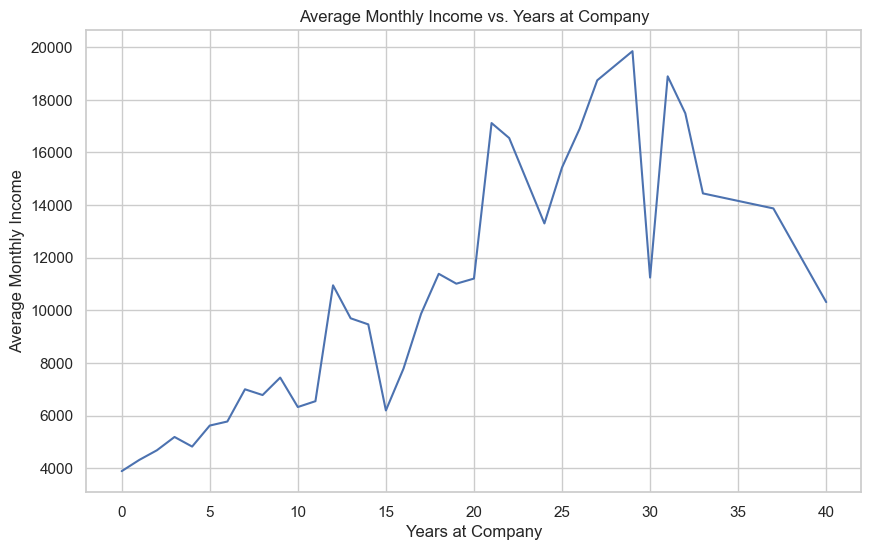

Department with highest average income: Sales - Average Income: 6817.394366197183
Department with lowest average income: Research & Development - Average Income: 6073.644444444444


In [55]:
# TODO: Plot (lineplot) the average MonthlyIncome against the YearsAtCompany. 
# TODO: Then find which departments have the highest and lowest incomes on average.
avg_income_by_years = df.groupby('YearsAtCompany')['MonthlyIncome'].mean()

plt.figure(figsize=(10, 6))
sns.lineplot(x=avg_income_by_years.index, y=avg_income_by_years.values)
plt.xlabel('Years at Company')
plt.ylabel('Average Monthly Income')
plt.title('Average Monthly Income vs. Years at Company')
plt.show()

avg_income_by_department = df.groupby('Department')['MonthlyIncome'].mean()

highest_income_department = avg_income_by_department.idxmax()
lowest_income_department = avg_income_by_department.idxmin()

print("Department with highest average income:", highest_income_department, 
      "- Average Income:", avg_income_by_department[highest_income_department])

print("Department with lowest average income:", lowest_income_department, 
      "- Average Income:", avg_income_by_department[lowest_income_department])

# Data Preprocessing (5 points)

Label Encode categorical columns and create a new DataFrame. Then split this data into train and test.

In [56]:
# TODO: Label encode all categorical columns
# Make a copy of the DataFrame to avoid altering the original data
encoded_df = df.copy()

label_encoders = {} 
for column in encoded_df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    encoded_df[column] = le.fit_transform(encoded_df[column])
    label_encoders[column] = le 

encoded_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,29,0,2,592,1,7,3,1,1883,4,...,3,2,0,11,2,3,3,2,1,2
1,34,0,2,1326,2,3,3,4,1478,4,...,3,4,0,15,2,3,13,9,3,12
2,27,0,2,954,2,9,3,2,1965,4,...,3,1,0,7,5,3,7,7,0,7
3,32,0,2,929,2,10,3,2,722,4,...,3,4,0,10,2,2,10,7,0,8
4,50,0,1,1234,1,20,5,3,1606,2,...,3,3,1,32,3,3,30,8,12,13


In [57]:
# Split into features and target variable
X = encoded_df.drop(columns=['Attrition'])  
y = encoded_df['Attrition']  

# TODO: Perform a train-test split using train_test_split() from sklearn
# Split the dataset into training and test sets with a test size of 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# TODO: Scale the features using StandardScaler
# Fit the scaler on the training data and transform both the training and test sets
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

X_train_scaled.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
363,0.542762,0.600505,0.884206,-0.486477,-0.155412,0.051225,-0.965482,1.416221,1.147220,0.837143,...,-0.415767,1.184078,-0.931571,-0.396724,0.137852,0.342314,-1.088707,-1.147282,-0.691030,-1.127621
596,-0.539674,0.600505,-1.028318,-0.486477,1.920680,1.001906,-0.965482,-0.155349,-1.574193,0.837143,...,2.405192,0.260526,-0.931571,-1.287136,-0.638795,-2.444787,-0.927597,-1.147282,-0.691030,-0.836369
773,-0.972648,0.600505,-0.331043,-0.486477,-1.010273,-0.899456,-0.965482,-0.436874,-1.574193,-1.194539,...,-0.415767,1.184078,-0.931571,-0.142321,0.914499,0.342314,0.039065,0.770063,0.323016,0.911144
298,-0.431430,0.600505,1.023661,-0.486477,-1.010273,1.001906,1.302083,-0.108980,0.240082,0.837143,...,-0.415767,-0.663025,-0.931571,-0.651128,-1.415443,0.342314,-0.605376,-0.599469,-0.691030,-0.545117
172,0.001544,-2.505384,-1.606059,1.432067,-0.033289,1.001906,0.546228,-0.627317,-1.574193,0.837143,...,-0.415767,1.184078,0.237060,-0.269523,2.467794,0.342314,0.361285,0.222251,1.675079,0.911144


# K-Nearest Neighbors (KNN) Model (15 points)

Implement KNN model from scratch.

In [58]:
import numpy as np
from collections import Counter

class CustomKNN:
    def __init__(self, k):
        """
        Initialize the KNN classifier.

        Parameters:
        - k (int): Number of neighbors to consider.
        """
        # Store the number of neighbors (k)
        self.k = k

    def fit(self, X_train, y_train):
        """
        Fit the KNN classifier to the training data.

        Parameters:
        - X_train (numpy array): Training feature vectors.
        - y_train (numpy array): Training labels.
        """
        # Store training data
        self.X_train = np.array(X_train)
        self.y_train = np.array(y_train)

    def euclidean_distance(self, x1, x2):
        """
        Calculate the Euclidean distance between two data points.

        Parameters:
        - x1 (numpy array): First data point.
        - x2 (numpy array): Second data point.

        Returns:
        - float: Euclidean distance between x1 and x2.
        """
        # TODO: Calculate and return the Euclidean distance
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def predict(self, X_test):
        """
        Predict labels for test data.

        Parameters:
        - X_test (numpy array): Test feature vectors.

        Returns:
        - numpy array: Predicted labels.
        """
        # TODO: Predict label for each test instance and return the array of predictions
        predictions = [self._predict(x) for x in np.array(X_test)]
        
        return np.array(predictions)

    def _predict(self, x):
        """
        Predict label for a single data point.

        Parameters:
        - x (numpy array): Test data point.

        Returns:
        - int: Predicted label.
        """
        # TODO: Compute distances from x to all training points.
        # Find the indices and labels of k nearest neighbors.
        # Perform mafority vote and return the most common label among them.
        k_nearest_labels = [self.y_train[i] for i in np.argsort([self.euclidean_distance(x, x_train) for x_train in self.X_train])[:self.k]]
        
        return Counter(k_nearest_labels).most_common(1)[0][0]


Fit and test your model using different k values and then choose the best one.

In [59]:
# Optional. You can choose any range of k values that you want.
# Keep the best k value (needed later on with bagging)
k_values = [1, 3, 5, 7, 9, 11, 13, 15]
accuracies = []

best_accuracy = 0
bestk = None
Best_custom_model = None

for k in k_values: 
    # TODO: Fit the model using the scaled training data
    # TODO: Make predictions on the scaled test data
    # TODO: Evaluate the model's accuracy for each value of k and choose the best one
    model = CustomKNN(k=k)
    
    model.fit(X_train_scaled, y_train)
    y_pred_custom = model.predict(X_test_scaled)
    
    accuracy = accuracy_score(y_test, y_pred_custom)
    accuracies.append(accuracy)
    
    print(f'k: {k} - Accuracy: {accuracy}')

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        bestk = k
        Best_custom_model = model
        
print(f'\nBest k value: {bestk} with accuracy: {best_accuracy}')

k: 1 - Accuracy: 0.8081180811808119
k: 3 - Accuracy: 0.8007380073800738
k: 5 - Accuracy: 0.8007380073800738
k: 7 - Accuracy: 0.8265682656826568
k: 9 - Accuracy: 0.8302583025830258
k: 11 - Accuracy: 0.8154981549815498
k: 13 - Accuracy: 0.8265682656826568
k: 15 - Accuracy: 0.8118081180811808

Best k value: 9 with accuracy: 0.8302583025830258


In [60]:
# TODO: Print the accuracy and classification report using sklearn's metrics for your best model
y_pred_best = Best_custom_model.predict(X_test_scaled)

best_accuracy = accuracy_score(y_test, y_pred_best)
print(f'Accuracy of the best model (k={bestk}): {best_accuracy:.4f}')

print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))

Accuracy of the best model (k=9): 0.8303

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.99      0.90       216
           1       0.85      0.20      0.32        55

    accuracy                           0.83       271
   macro avg       0.84      0.60      0.61       271
weighted avg       0.83      0.83      0.79       271



Visualize the confusion matrix for KNN predictions

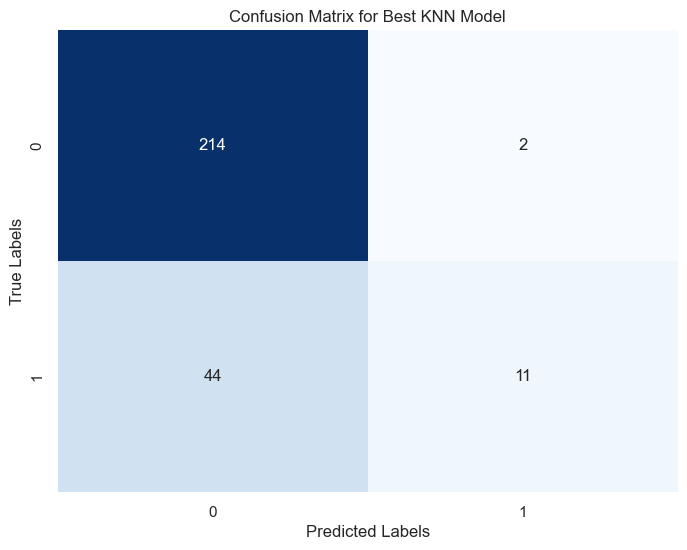

In [61]:
# TODO: Create a confusion matrix for KNN predictions
# Use confusion_matrix from sklearn.metrics
cm = confusion_matrix(y_test, y_pred_best)

# TODO: Visualize the confusion matrix using seaborn's heatmap
# Add annotations and a title for better readability
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Best KNN Model')
plt.show()

## Evaluation (30 points)
In this part, we are going to evaluate your model's performance on another set of unseen data. Load test.csv (this data is already encoded), use your best_custom_model to predict and save the results in a DataFrame called 'result.csv'. The DataFrame should contain one column called 'target' that contains your model's predictions.

In [62]:
# Load test.csv
eval_df= pd.read_csv('test.csv')

# TODO: Use your old scaler to scale the data
# TODO: Predict using your model
eval_df_scaled = scaler.transform(eval_df)

y_pred_eval = Best_custom_model.predict(eval_df_scaled)

Save the results in a DataFrame

In [63]:
# Save the results as a csv file
result_df= pd.DataFrame()
result_df['target']=pd.Series(y_pred_eval)
result_df.to_csv('result.csv', index= False)

# Random Forest Model (12 points)

Implement a random forest model using sklearn.

In [64]:
# TODO: Implement the Random Forest model
rf = RandomForestClassifier(random_state=42)

# TODO: Set up a hyperparameter tuning process for Random Forest using GridSearchCV
# Suggested parameter grid: {'n_estimators': [100, 200, 300], 'max_depth': [10, 20, None], 'min_samples_split': [2, 5, 10]}
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

# GridSearchCV with Random Forest
rf_cv = GridSearchCV(rf, param_grid_rf, cv=5)

# TODO: Fit the GridSearchCV on the training data to find the best parameters
# Use rf_cv.fit() with the training data
rf_cv.fit(X_train_scaled, y_train)

# TODO: Use the best Random Forest model for predictions on the test data
# Use rf_cv.best_estimator_ and predict()
y_pred_rf = rf_cv.best_estimator_.predict(X_test_scaled)

# TODO: Print the Random Forest model accuracy and classification report using sklearn's metrics
# Use accuracy_score and classification_report
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Model Accuracy: {rf_accuracy:.4f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("Best Parameters:", rf_cv.best_params_)

Random Forest Model Accuracy: 0.8339

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.98      0.90       216
           1       0.78      0.25      0.38        55

    accuracy                           0.83       271
   macro avg       0.81      0.62      0.64       271
weighted avg       0.83      0.83      0.80       271

Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}


Visualize the confusion matrix for Random Forest predictions

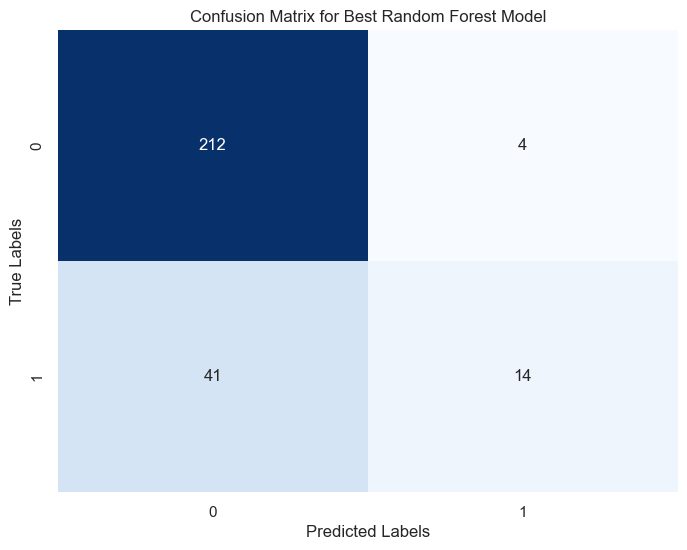

In [65]:
# TODO: Create a confusion matrix for Random Forest predictions
# Use confusion_matrix from sklearn.metrics
cm_rf = confusion_matrix(y_test, y_pred_rf)

# TODO: Visualize the confusion matrix using seaborn's heatmap
# Add annotations and a title for better readability
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Best Random Forest Model')
plt.show()

A feature importance plot is a visual representation that illustrates the significance of each feature (or variable) in a machine learning model, particularly in the context of supervised learning tasks like classification and regression. Plot the feature importances using a bar plot.

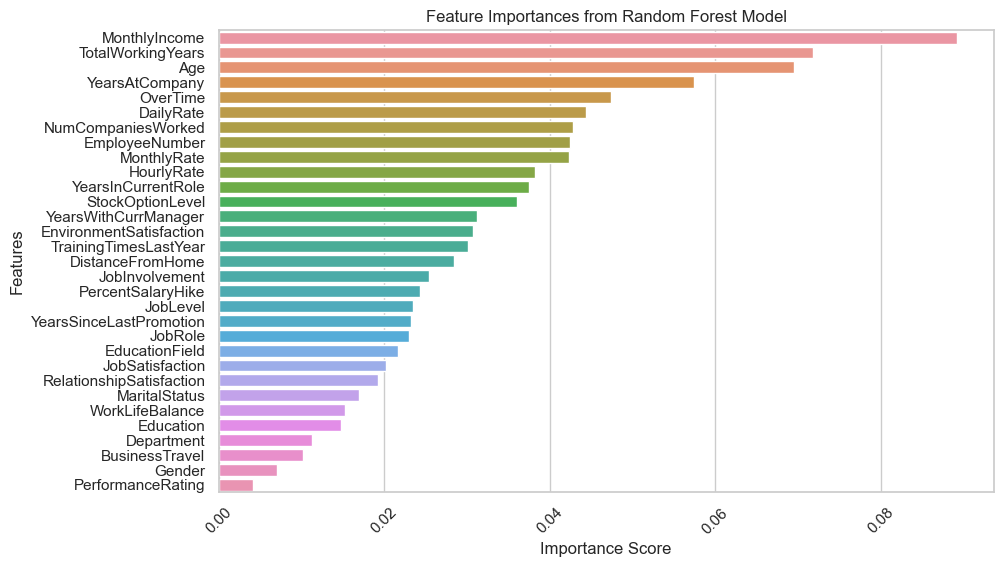

In [66]:
# Get the feature importances from the trained Random Forest model
importances= rf_cv.best_estimator_.feature_importances_

# TODO: Sort the indices of the importance values in descending order
# TODO: Create a DataFrame that contains the feature names and their corresponding importance scores
# TODO: Create a bar plot to visualize feature importances using Seaborn

# use tick_params and Rotate the x-axis labels for better readability
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances from Random Forest Model')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tick_params(axis='x', rotation=45) 
plt.show()

# Bagging with KNN (12 points)

In [67]:
# TODO: Implement Bagging with KNN
# Use BaggingClassifier with KNeighborsClassifier as the base estimator
# Here we use the bestk value we found before

bagging_knn = BaggingClassifier(KNeighborsClassifier(n_neighbors=bestk), n_estimators=50, random_state=42)

# TODO: Fit the BaggingClassifier on the scaled training data
# Use bagging_knn.fit() with the training data
bagging_knn.fit(X_train_scaled, y_train)

# TODO: Use the trained Bagging model for predictions on the test data
# Use bagging_knn.predict()
y_pred_bagging_knn = bagging_knn.predict(X_test_scaled)

# TODO: Print the Bagging KNN model accuracy and classification report
# Use accuracy_score and classification_report
bagging_knn_accuracy = accuracy_score(y_test, y_pred_bagging_knn)
print(f"Bagging KNN Model Accuracy: {bagging_knn_accuracy:.4f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred_bagging_knn))

Bagging KNN Model Accuracy: 0.8266

Classification Report:
              precision    recall  f1-score   support

           0       0.82      1.00      0.90       216
           1       0.90      0.16      0.28        55

    accuracy                           0.83       271
   macro avg       0.86      0.58      0.59       271
weighted avg       0.84      0.83      0.77       271



Visualize the confusion matrix for Baggin KNN predictions

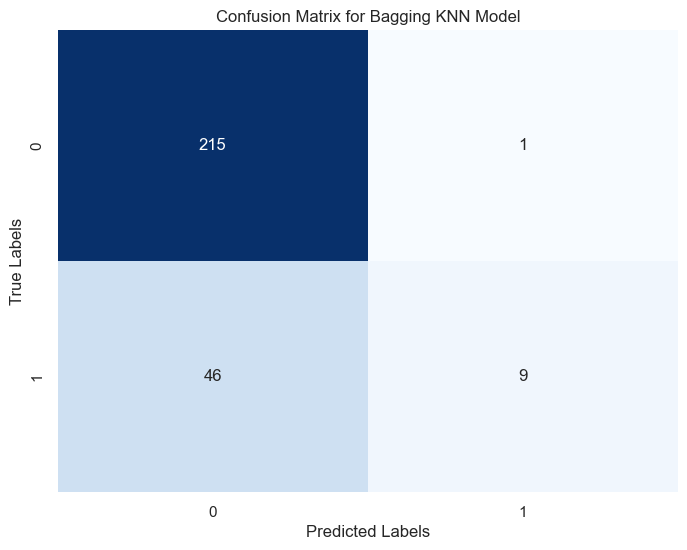

In [68]:
# TODO: Create a confusion matrix for Bagging KNN predictions
# Use confusion_matrix from sklearn.metrics
cm_bagging_knn = confusion_matrix(y_test, y_pred_bagging_knn)

# TODO: Visualize the confusion matrix using seaborn's heatmap
# Add annotations and a title for better readability
plt.figure(figsize=(8, 6))
sns.heatmap(cm_bagging_knn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Bagging KNN Model')
plt.show()

# AdaBoost Model (12 points)

In [69]:
# TODO: Implement AdaBoost model
adaboost = AdaBoostClassifier(random_state=42)

# TODO: Set up a hyperparameter tuning process for AdaBoost using GridSearchCV
# Suggested parameter grid: {'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.1, 1.0]}
param_grid_ada = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1.0]
}

# GridSearchCV with AdaBoost
adaboost_cv = GridSearchCV(adaboost, param_grid_ada, cv=5)

# TODO: Fit the GridSearchCV on the training data to find the best parameters
# Use adaboost_cv.fit() with the training data
adaboost_cv.fit(X_train_scaled, y_train)

# TODO: Use the best AdaBoost model for predictions on the test data
# Use adaboost_cv.best_estimator_ and predict()
y_pred_adaboost = adaboost_cv.best_estimator_.predict(X_test_scaled)

# TODO: Print the AdaBoost model accuracy and classification report using sklearn's metrics
# Use accuracy_score and classification_report
adaboost_accuracy = accuracy_score(y_test, y_pred_adaboost)
print(f"AdaBoost Model Accuracy: {adaboost_accuracy:.4f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred_adaboost))

print("Best Parameters:", adaboost_cv.best_params_)

AdaBoost Model Accuracy: 0.8339

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.99      0.90       216
           1       0.81      0.24      0.37        55

    accuracy                           0.83       271
   macro avg       0.82      0.61      0.64       271
weighted avg       0.83      0.83      0.80       271

Best Parameters: {'learning_rate': 0.1, 'n_estimators': 100}


Visualize the confusion matrix for AdaBoost predictions

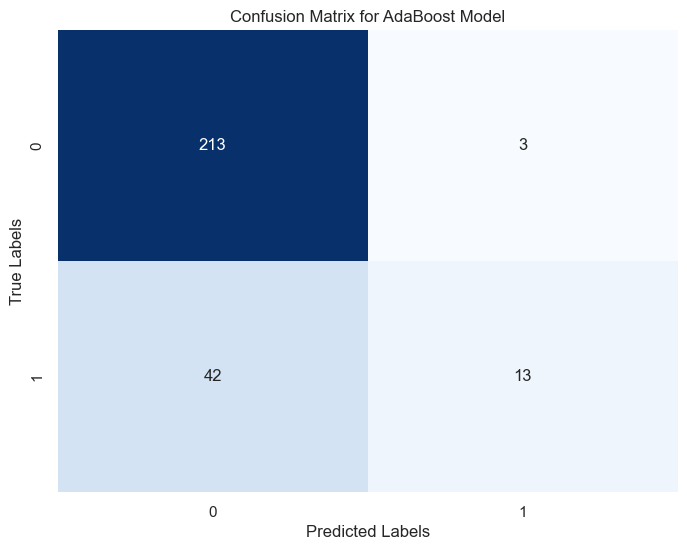

In [70]:
# TODO: Create a confusion matrix for AdaBoost predictions
# Use confusion_matrix from sklearn.metrics
cm_adaboost = confusion_matrix(y_test, y_pred_adaboost)

# TODO: Visualize the confusion matrix using seaborn's heatmap
# Add annotations and a title for better readability
plt.figure(figsize=(8, 6))
sns.heatmap(cm_adaboost, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for AdaBoost Model')
plt.show()

# Model Comparison (4 points)

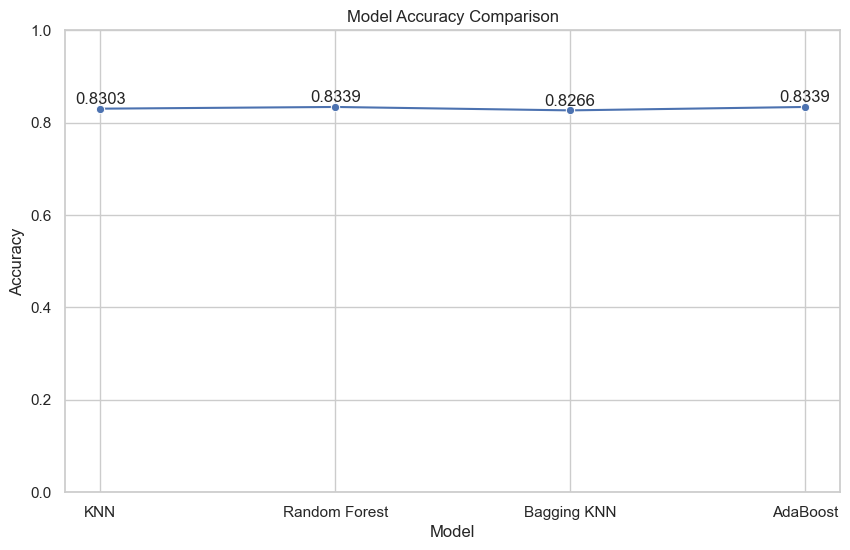

In [72]:
# TODO: Compare model accuracies for KNN, Random Forest, Bagging KNN, and AdaBoost
# Create a DataFrame with model names and their respective accuracies
model_accuracies = {
    'Model': ['KNN', 'Random Forest', 'Bagging KNN', 'AdaBoost'],
    'Accuracy': [best_accuracy, rf_accuracy, bagging_knn_accuracy, adaboost_accuracy]
}

accuracy_df = pd.DataFrame(model_accuracies)

# TODO: Visualize the model comparison using a line plot
# Use seaborn's lineplot to plot model names vs. accuracies
plt.figure(figsize=(10, 6))
sns.lineplot(x='Model', y='Accuracy', data=accuracy_df, marker='o')
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1) 

for i, row in accuracy_df.iterrows():
    plt.text(x=row['Model'], y=row['Accuracy'] + 0.01, 
             s=f"{row['Accuracy']:.4f}", ha='center')

plt.show()